# Leistungsanpassung und Spannungsregelung

In [1]:
# Bibliotheken laden
import numpy as np
import matplotlib.pyplot as plt
import cmath # für komplexe Zahlen
# Graphikparameter
plt.style.use('classic')
plt.rcParams.update({'font.size':24})
plt.rcParams.update({'figure.autolayout': True})

Eine Quelle hat eine bestimmte Kennlinie. Dies gilt auch bei Wechselspannungssystemen. Wie man die Quelle an den Bedarf der Last anpasst, beschreibt der Begriff der **Leistungsanpassung**. Außerdem hat die Blindleistung einer Last auch einen Effekt auf die Netzspannung. Dies wird zur **Spannungsregelung** herangezogen.

In diesem Notebook geht es um beide Effekte. 

## Leistungsanpassung

Das folgende Schaltbild zeigt den prinzipiellen Aufbau einer Quelle mit Innenimpedanz $\underline{Z_i}=R_i+jX_i$, an der ein Verbraucher mit der Impedanz $\underline{Z_V}=R_V+jX_V$ angeschlossen ist:

![Quelle mit komplexem Innenwiderstand und komplexer Last](./ge2_komplexequelle.png)

Die Frage ist nun, wann die maximale Leistung aus der Quelle abgegeben werden kann. 

### Fall 1: Verbraucher mit veränderbarem $R_V$ und veränderbarem $X_V$

Text(0.5, 0, '$t [ms]$')

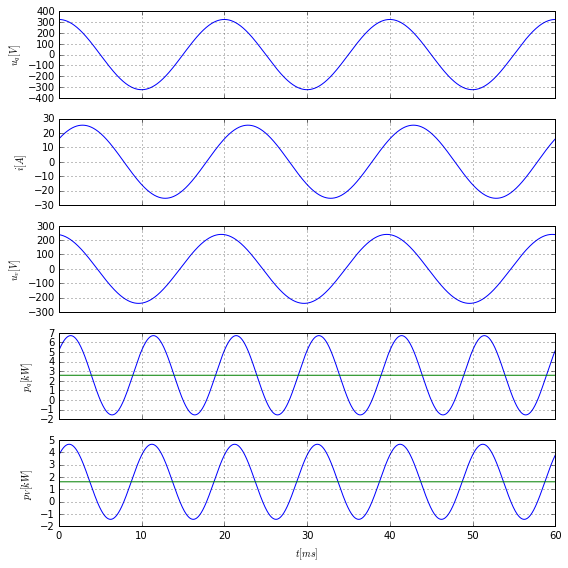

In [2]:
# Zeitvektor
t = np.linspace(0,60e-3,100000) # 0 bis 60 ms in 100.000 Schritten
# Spannungsquelle
Uq = 230
f = 50
omega = 2*np.pi*f
uq = Uq*np.sqrt(2)*np.cos(omega*t) # Phase 0 angenommen
# Innenwiderstand und Innenreaktanz
Ri = 3 # kann nur positiv sein! Anfangswert 3 Ohm
Xi = 2 # kann positiv oder negativ sein, Anfangswert 2 Ohm
# Verbraucherwiderstand und Verbraucherreaktanz
RV = 5 # kann nur positiv sein! Anfangswert 5 Ohm
XV = 8 # kann positiv oder negativ sein, Anfangswert 8 Ohm
# Strom berechnen
Ikomplex = Uq/complex(Ri+RV,Xi+XV)
# Ikomplex = Ikomplexbetrag * exp(j*phaseIkomplex)
i = np.sqrt(2)*np.abs(Ikomplex)*np.cos(omega*t + cmath.phase(Ikomplex))
# Spannung an der Last berechnen
UVkomplex = Ikomplex*complex(RV,XV)
uv = np.sqrt(2)*np.abs(UVkomplex)*np.cos(omega*t + cmath.phase(UVkomplex))
# Leistung berechnen
pq = uq*i # Augenblicksleistung der Quelle (Abgabe)
Pq = np.mean(pq) # Wirkleistung der Quelle (Abgabe)
pV = uv*i # Augenblicksleistung der Last (Aufnahme)
PV = np.mean(pV) # Wirkleistungsaufnahme der Last

# Diagramme von uq, uv, i, pq, pv
# - wir machen 5 Diagramme untereinander
# - jeweils blau ist der Zeitverlauf
# - und grün der Mittelwert
fig, ax = plt.subplots(5, 1, sharex=True, sharey=False, figsize=(8, 8))
# Quellspannung uq
ax[0].plot(1000*t,uq)
ax[0].set_ylabel(r'$u_q [V]$')
ax[0].grid()
# Strom i
ax[1].plot(1000*t,i)
ax[1].set_ylabel(r'$i [A]$')
ax[1].grid()
# Verbraucherspannung uv
ax[2].plot(1000*t,uv)
ax[2].set_ylabel(r'$u_v [V]$')
ax[2].grid()
# Leistungsabgabe der Quelle
ax[3].plot(1000*t,0.001*pq)
ax[3].plot(1000*t,0.001*Pq*np.ones(len(t)))
ax[3].set_ylabel(r'$p_q [kW]$')
ax[3].grid()
# Leistungsaufnahme der Last
ax[4].plot(1000*t,0.001*pV)
ax[4].plot(1000*t,0.001*PV*np.ones(len(t)))
ax[4].set_ylabel(r'$p_V [kW]$')
ax[4].grid()
ax[4].set_xlabel(r'$t [ms]$')

Wir geben nun auch die Wirkleistung, Blindleistung und Scheinleistung an Quelle und Last aus. Dafür beachten wird, dass die komplexe Scheinleistung der Quelle sich aus der Phase des Stroms ergibt:

\begin{equation}
\underline{S_q}=\underline{U_q}\cdot\underline{I^*}=U_q\cdot I\cdot e^{-j\varphi_i} = S\cdot e^{-j\varphi_i}
\end{equation}

Die Phase des Stroms ist:

In [3]:
phii=cmath.phase(Ikomplex)
print('phii=', phii,' rad')

phii= -0.8960553845713439  rad


**Leistungen an der Quelle**:

In [4]:
Sq = Uq*np.abs(Ikomplex)*complex(np.cos(-phii),np.sin(-phii))
print('Sq=',0.001*Sq,'kVA')

Sq= (2.580487804878049+3.225609756097561j) kVA


In [5]:
Qq = Sq.imag
print('Qq=',0.001*Qq,'kvar')

Qq= 3.225609756097561 kvar


In [6]:
print('Pq=',0.001*Pq,'kW')

Pq= 2.580513609756097 kW


Wir geben nun auch die Wirkleistung, Blindleistung und Scheinleistung an der Last an. Dafür beachten wir, dass die komplexe Scheinleistung an der Last sich aus der Phase des Stroms und der Spannung ergibt:

\begin{equation}
\underline{S_V}=\underline{U_V}\cdot\underline{I_V^*} = U_V\cdot e^{j\varphi_u}\cdot I\cdot e^{-j\varphi_i} = U_V \cdot I \cdot e^{j\varphi_u - \varphi_i}
\end{equation}

**Leistungen am Verbraucher**:

In [7]:
# Phase der Spannung am Verbraucher
phiuv = cmath.phase(UVkomplex)
# Scheinleistung am Verbraucher
SV = np.abs(UVkomplex)*np.abs(Ikomplex)*complex(np.cos(phiuv-phii),np.sin(phiuv-phii))
print('SV=',0.001*SV,'kVA')

SV= (1.612804878048781+2.580487804878049j) kVA


In [8]:
QV = SV.imag
print('QV=',0.001*QV,'kvar')

QV= 2.580487804878049 kvar


In [9]:
print('PV=',0.001*PV,'kW')

PV= 1.6128265132361688 kW


**Aufgabe: Verändern Sie zunächst `XV` so, dass die Leistung $P_V$ möglichst groß wird, während Sie `RV` konstant lassen. Welchen Wert muss `XV` dann haben und notieren Sie zudem nochmals den Wert von `Xi`.**

*Ergebnis:*
*`XV` muss den Wert ... haben, wenn `Xi` den Wert ... hat, damit die Leistung maximal wird.*

**Aufgabe: Behalten Sie den soeben ermittelten Wert von `XV` bei. Ändern Sie nun `RV` so, dass die Leistung $P_V$ möglichst groß wird, während Sie alle anderen Werte konstant lassen. Welchen Wert muss `RV` dann haben und notieren Sie zudem nochmals den Wert von `Ri`.**

*Ergebnis: RV muss den Wert ... haben, wenn Ri den Wert ... hat, damit die Leistung maximal wird.*

**Aufgabe: Ermitteln Sie die Phase der Verbraucherimpedanz und der Quellimpedanz und vergleichen Sie.**

*Ergebnis:*

### Fall 2: Verbraucher mit veränderbarem $R_V$ und $X_V=0$ (reiner Wirkwiderstand)

**Aufgabe: Setzen Sie nun in der obigen Berechnung für $X_V=0$ ein. Und ermitteln Sie wieder, bei welchem `RV` bezogen auf `Ri` sich die maximale Leistung einstellt.**

*Ergebnis: RV muss den Wert ... haben, wenn Ri den Wert ... hat, damit die Leistung maximal wird.*

### Fall 3: Verbraucher mit $R_V=0$ und veränderbarem $X_V$ (reiner Blindwiderstand)

**Aufgabe: Setzen Sie nun in der obigen Berechnung für $R_V=0$ ein. Und ermitteln Sie wieder, bei welchem `XV` bezogen auf `Xi` sich die maximale Leistung einstellt.**

*Ergebnis:*

## Spannungsregelung mit Blindleistung

Wir betrachten nun das elektrische Stromnetz als ideale Quelle und eine Leitung mit einer Induktivität (das einfachste Ersatzschaltbild für eine Leitung, siehe Skript). 

![Einfache Leitung und komplexe Last](./ge2_einfacheleitung.png)

Nun regeln wir am Verbraucher die Blindleistung so, dass die Spannung sich auf der Leitung auf der Verbraucherseite besser im Spannungsband hält. Das Spannungsband beträgt im Niederspannungsnetz $\pm 10\%$ der Nennspannung.

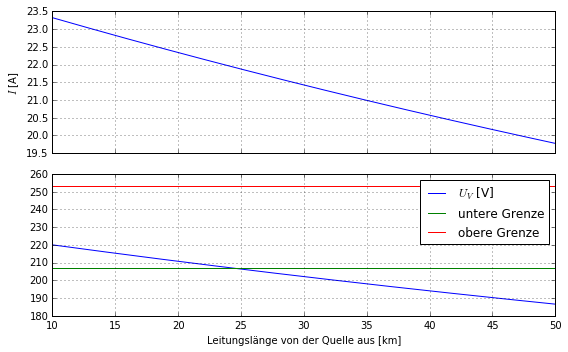

In [13]:
# Leitungsreaktanz pro Leitungslänge
l = np.linspace(10e3,50e3,1000) # 10 bis 50 km in 1000 Schritten
xL = 50e-6 # 50 uOhm/km
XL = l*xL
# Verbraucherwiderstand und Verbraucherreaktanz
RV = 5 # kann nur positiv sein! Anfangswert 5 Ohm
XV = 8 # kann positiv oder negativ sein, Anfangswert 8 Ohm
# Strom berechnen
Ikompl = Uq/(RV+1j*(XL+XV))
# Spannung an der Last berechnen
UVkompl = Ikompl*(RV+1j*XV)
# Spannung an der Leitung berechnen
ULkompl = Ikompl*1j*XL
# Leistung berechnen
SVkompl = UVkompl*np.conj(Ikomplex)
SLkompl = ULkompl*np.conj(Ikomplex)
PVkompl = SVkompl.real
PLkompl = SLkompl.real
QVkompl = SVkompl.imag
QLkompl = SLkompl.imag

# Diagramme von uq, uv, i, pq, pv
# - wir machen 5 Diagramme untereinander
# - jeweils blau ist der Zeitverlauf
# - und grün der Mittelwert
fig, ax = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(8, 5))
# Strombetrag 
ax[0].plot(0.001*l,np.abs(Ikompl))
ax[0].set_ylabel(r'$I$ [A]')
ax[0].grid()
# Spannung am Leitungsende beim Verbraucher
ax[1].plot(0.001*l,np.abs(UVkompl),label=r'$U_V$ [V]')
ax[1].plot(0.001*l,0.9*Uq*np.ones(len(l)),label='untere Grenze')
ax[1].plot(0.001*l,1.1*Uq*np.ones(len(l)),label='obere Grenze')
ax[1].set_xlabel(r'Leitungslänge von der Quelle aus [km]')
ax[1].grid()
ax[1].legend()

Mit unseren Zahlenwerten sinkt die Spannung ab 25 km Leitungslänge unterhalb den erlaubten Spannungswert. Ob dies tatsächlich nach dieser Leitungslänge bereits der Fall ist, hängt davon ab, wie viele Lasten angeschlossen sind (die die Spannung verringeren) und wie viele Erzeuger angeschlossen sind (die die Spannung wiederum erhöhen). Genauer lernen Sie das im Modul elektrische Netze. Hier soll es nur darum gehen, wie man gegensteuern kann, wenn die Spannung zu hoch oder zu tief wird.

**Aufgabe: Verändern Sie die Reaktanz des Verbrauchers `XV` so, dass das Spannungsband wieder eingehalten wird bis zur Leitungslänge $l=50\text{ km}$.**

*Ergebnis: Die Reaktanz des Verbrauchers muss von 8 Ohm auf ... verändert werden, damit das Spannungsband wieder eingehalten werden kann. Sie darf in negativer Richtung auf ... verändert werden, da sonst das Spannungsband in der anderen Richtung verletzt wird.*

**Aufgabe: Welches Bauteil benötigen Sie, um die Reaktanz in der beschriebenen Weise zu verändern? Dimensionieren Sie dieses Bauteil.**

*Ergebnis: ich benötige eine Induktivität / eine Kapazität der Größe ... um die Spannungsgrenze nach unten einzuhalten und ich benötige eine Induktivität / eine Kapazität der Größe ... um die Spannungsgrenze nach oben einzuhalten.*

## Leistung bei Spannungserhöhung mit kapazitiver Blindleistung

![Leitung mit kapazitiver Spannungsregelung](./ge2_leitungkapazitivespannung.png)

Zunächst betrachten wir die Leitung mit der Induktivität $X_L$, vernachlässigbarem Ohmschem Widerstand $R_L=0$ und der Last mit $X_V=0$. Die Last $R_V$ wird nun variiert, um den Effekt der Last auf die Spannung am Verbraucheranschluss zu ermitteln.

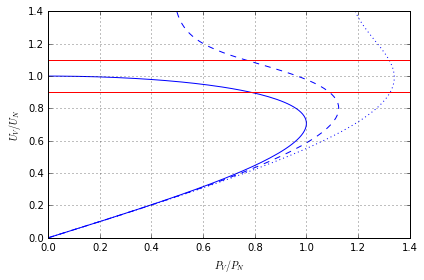

In [14]:
# Hier nochmal alle Größen neu definieren, der Übersicht halber
# Netzspannung
Uq = 230
# Ohmscher Widerstand der Leitung ist 0
RL = 0
# Leitungsreaktanz
XL = .1 # Anfangswert .1 Ohm
# Ohmscher Widerstand am Verbraucher
RV = np.append(0,np.geomspace(.0001,1e12,1000)) # von 0 bis fast unendlich in vielen Schritten
# Verbraucherreaktanz vernachlässigbar ist 0
XV = 0
# Strom ohne Kondensator
Iohne = Uq/(RL+RV+1j*(XL+XV)) # 1j ist die komplexe Einheit, complex geht nur für Skalare
# Spannung am Verbraucher ohne Kondensator
UVohne = Iohne*(RV+1j*XV)
# Leistung am Verbraucher ohne Kondensator
SVohne = UVohne*np.conj(Iohne)
PVohne = SVohne.real # Wirkleistung
# Kondensatorreaktanz (negativ!)
XC1 = -1
XC2 = -.5
# Strom mit Kondensator
Imit1 = Uq/(RL+ 1j*XL + (((RV + 1j*XV)*(1j*XC1))/(RV + 1j*(XC1+XV)))) # ZL + ZV || ZC
Imit2 = Uq/(RL+ 1j*XL + (((RV + 1j*XV)*(1j*XC2))/(RV + 1j*(XC2+XV))))
# Spannung am Verbraucher ohne Kondensator
UVmit1 = Imit1*(RV+1j*XV)
UVmit2 = Imit2*(RV+1j*XV)
# Leistung am Verbraucher mit Kondensator
SVmit1 = UVmit1*np.conj(Imit1)
SVmit2 = UVmit2*np.conj(Imit2)
PVmit1 = SVmit1.real
PVmit2 = SVmit2.real

# normierte Größen: Spannung
#uvohnew = UVohneW/Uq
uvohne = np.abs(UVohne)/Uq
uvmit1 = np.abs(UVmit1)/Uq
uvmit2 = np.abs(UVmit2)/Uq
# normierte Größen: Leistung
pvohne = PVohne/np.max(PVohne)
pvmit1 = PVmit1/np.max(PVohne)
pvmit2 = PVmit2/np.max(PVohne)

# Diagramm
plt.plot(pvohne,uvohne,'b-')
plt.plot(pvmit1,uvmit1,'b--')
plt.plot(pvmit2,uvmit2,'b:')
plt.xlabel('$P_V/P_N$')
plt.ylabel('$U_V/U_N$')
plt.axis([0,1.4*max(pvohne),0,1.4])
plt.plot([0,1.4],0.9*np.ones(2),'r-')
plt.plot([0,1.4],1.1*np.ones(2),'r-')
plt.grid()

**Aufgabe: Welche Schwierigkeit hat der Netzbetreiber bei einer zeitlich variablen Last, die zwischen 80 und 130% der Nennleistung variiert?**

*Antwort: Wenn die Last zunimmt von 0% bis 80% dann sinkt die Spannung bei 80% auf die untere Spannungsgrenze und kapazitive Blindleistung wird nötig (z. B. gestrichelte Linie). Dann nimmt die Last weiter zu auf 110% und die Spannung ist wieder so niedrig, dass ... . Ab einer gewissen Blindleistung (gepunktete Linie) ist der Zusammenhang zwischen Leistung und Spannung zweideutig: Eine Verringerung der Leistung kann sowohl zur Erhöhung der Spannung als auch zur Verringerung der Spannung führen. Es kann daher passieren, dass ...*